# Model Training

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_addons as tfa

from tqdm import tqdm
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from tensorflow.keras.optimizers import Adam

### Read Processed Data

In [5]:
listings_df = pd.read_csv('../data/processed/processed_listings.csv').dropna()
print('Number of listings: ' + str(len(listings_df)))

Number of listings: 125144


In [6]:
listings_df.head()

,Subtype,Style,Living Area,Lot Dimensions,Bedrooms,Bathrooms,Levels,Listing Date,Listing Year,Year of Construction,Age,Location,RCM,Region,Price
0,Bungalow,Unknown,888,9084,2,1,1,2021-11-01,2021,2018,3,Les Maskoutains & Acton,Acton,Montérégie,355000
1,Bungalow,Open area,1440,11900,4,2,1,2021-11-01,2021,2015,6,Les Maskoutains & Acton,Acton,Montérégie,389000
2,1 1/2 Storey,Cathedral roof,862,9084,2,1,2,2021-06-01,2021,1990,31,Les Maskoutains & Acton,Acton,Montérégie,549000
3,Bungalow,Mid-level entrance,1100,9500,3,1,1,2021-06-01,2021,1972,49,Les Maskoutains & Acton,Acton,Montérégie,240000
4,Semi-detached,New construction,960,8218,2,1,1,2021-06-01,2021,2020,1,Les Maskoutains & Acton,Acton,Montérégie,275000


### Choosing columnns

In [7]:
ordinal_cols = []
one_hot_cols = ['Subtype', 'Location']
numerical_cols = ['Living Area', 'Bedrooms', 'Bathrooms', 'Levels', 'Listing Year', 'Age']
target_col = ['Price']

In [8]:
listings_df = listings_df[ordinal_cols + one_hot_cols + numerical_cols + target_col]
listings_df.head()

,Subtype,Location,Living Area,Bedrooms,Bathrooms,Levels,Listing Year,Age,Price
0,Bungalow,Les Maskoutains & Acton,888,2,1,1,2021,3,355000
1,Bungalow,Les Maskoutains & Acton,1440,4,2,1,2021,6,389000
2,1 1/2 Storey,Les Maskoutains & Acton,862,2,1,2,2021,31,549000
3,Bungalow,Les Maskoutains & Acton,1100,3,1,1,2021,49,240000
4,Semi-detached,Les Maskoutains & Acton,960,2,1,1,2021,1,275000


### One Hot Encoding

In [9]:
def oh_encode(df_line, col, new_col, val):
    if df_line[col] == val:
        return df_line[new_col] + 1
    else:
        return df_line[new_col]

for col in one_hot_cols:
    for val in tqdm(listings_df[col].unique()):   
        new_col = str(val) + '_' + col
        listings_df[new_col] = 0
        listings_df[new_col] = listings_df.apply(oh_encode, args=(col, new_col, val), axis=1)

    listings_df = listings_df.drop(columns=[col])

100%|██████████| 110/110 [02:07<00:00,  1.16s/it]


In [10]:
listings_df.head()

,Living Area,Bedrooms,Bathrooms,Levels,Listing Year,Age,Price,Bungalow_Subtype,1 1/2 Storey_Subtype,Semi-detached_Subtype,...,Les Appalaches_Location,Trois-Rivières_Location,Le Val-Saint-François & Les Sources_Location,Vaudreuil-Soulanges_Location,Verdun_Location,Ville de Mont-Royal_Location,Ville-Marie_Location,Villeray-Saint-Michel-Parc-Extension_Location,Vimont_Location,Westmount_Location
0,888,2,1,1,2021,3,355000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1440,4,2,1,2021,6,389000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,862,2,1,2,2021,31,549000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1100,3,1,1,2021,49,240000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,960,2,1,1,2021,1,275000,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Ordinal Encoding

In [11]:
ordinal_encoders = {}

for col in ordinal_cols:
    ordinal_encoders[col] = OrdinalEncoder()
    ordinal_encoders[col].fit(listings_df[[col]])
    listings_df[col] = ordinal_encoders[col].transform(listings_df[[col]])

listings_df.head()

,Living Area,Bedrooms,Bathrooms,Levels,Listing Year,Age,Price,Bungalow_Subtype,1 1/2 Storey_Subtype,Semi-detached_Subtype,...,Les Appalaches_Location,Trois-Rivières_Location,Le Val-Saint-François & Les Sources_Location,Vaudreuil-Soulanges_Location,Verdun_Location,Ville de Mont-Royal_Location,Ville-Marie_Location,Villeray-Saint-Michel-Parc-Extension_Location,Vimont_Location,Westmount_Location
0,888,2,1,1,2021,3,355000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1440,4,2,1,2021,6,389000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,862,2,1,2,2021,31,549000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1100,3,1,1,2021,49,240000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,960,2,1,1,2021,1,275000,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Split Data (Test/Train)

In [12]:
y = listings_df[target_col]
X = listings_df.drop(columns=target_col)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Scale Data
Using Min Max Scaler

In [13]:
scaled_cols = numerical_cols + ordinal_cols

scalers = {}

for col in scaled_cols:
    scalers[col] = MinMaxScaler()
    X_train[col] = scalers[col].fit_transform(X_train[[col]])
    X_test[col] = scalers[col].transform(X_test[[col]])

In [14]:
scale_target = True

if scale_target:
    target_scaler = MinMaxScaler()

    y_train = target_scaler.fit_transform(y_train)
    y_test = target_scaler.fit_transform(y_test)

X_train.head()

,Living Area,Bedrooms,Bathrooms,Levels,Listing Year,Age,Bungalow_Subtype,1 1/2 Storey_Subtype,Semi-detached_Subtype,2 Storey_Subtype,...,Les Appalaches_Location,Trois-Rivières_Location,Le Val-Saint-François & Les Sources_Location,Vaudreuil-Soulanges_Location,Verdun_Location,Ville de Mont-Royal_Location,Ville-Marie_Location,Villeray-Saint-Michel-Parc-Extension_Location,Vimont_Location,Westmount_Location
34944,0.131429,0.50,0.5,0.0,1.000000,0.183432,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77882,0.119429,0.25,0.0,0.0,0.944444,0.076923,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18503,0.151143,0.50,0.5,0.0,0.888889,0.017751,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40482,0.241143,0.50,1.0,0.5,0.388889,0.106509,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
124499,0.132000,0.50,0.0,0.0,0.444444,0.597633,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Neural Network Training

In [146]:
model = Sequential()
model.add(Dense(units=100, activation='tanh', input_shape=(X_train.shape[-1],)))
model.add(Dense(units=10, activation='tanh', input_shape=(X_train.shape[-1],)))
model.add(Dense(units=5, activation='tanh'))
model.add(Dense(units=1, activation='linear'))

print(model.summary())

model.compile(optimizer=Adam(lr=0.001), loss='mse')

history = model.fit(X_train, y_train, batch_size=1000, epochs=500, shuffle=True, verbose=1, validation_data=(X_test, y_test))

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 100)               12600     
                                                                 
 dense_76 (Dense)            (None, 10)                1010      
                                                                 
 dense_77 (Dense)            (None, 5)                 55        
                                                                 
 dense_78 (Dense)            (None, 1)                 6         
                                                                 
Total params: 13,671
Trainable params: 13,671
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500


c:\Users\simka\Documents\GitHub\quebec-real-estate\venv\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


101/101 [==============================] - 1s 3ms/step - loss: 0.0158 - val_loss: 0.0051
Epoch 2/500
101/101 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 3/500
101/101 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 4/500
101/101 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 5/500
101/101 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 6/500
101/101 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 7/500
101/101 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 8/500
101/101 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 9/500
101/101 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 10/500
101/101 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0034
E

In [147]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

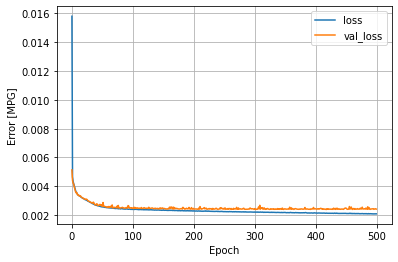

In [148]:
plot_loss(history)

In [155]:
predicted_prices = target_scaler.inverse_transform(model.predict(X_test))
real_prices = target_scaler.inverse_transform(y_test)

In [156]:
test_df = X_test.copy()

for col in scaled_cols:
    test_df[col] = scalers[col].inverse_transform(test_df[[col]])

for col in ordinal_cols:
    test_df[col] = ordinal_encoders[col].inverse_transform(test_df[[col]])

In [157]:
d = {}
d['real price'] = list(real_prices)
d['predicted price'] = list(predicted_prices)

test_df['real price'] = d['real price']
test_df['predicted price'] = d['predicted price']

test_df['real price'] = test_df['real price'].astype(int)
test_df['predicted price'] = test_df['predicted price'].astype(int)

In [158]:
test_df.head(12)

,Living Area,Bedrooms,Bathrooms,Levels,Listing Year,Age,Bungalow_Subtype,1 1/2 Storey_Subtype,Semi-detached_Subtype,2 Storey_Subtype,...,Le Val-Saint-François & Les Sources_Location,Vaudreuil-Soulanges_Location,Verdun_Location,Ville de Mont-Royal_Location,Ville-Marie_Location,Villeray-Saint-Michel-Parc-Extension_Location,Vimont_Location,Westmount_Location,real price,predicted price
107435,1560.0,5.0,2.0,2.0,2021.0,5.0,0,0,1,0,...,0,0,0,0,0,0,0,0,610000,613831
108023,1600.0,4.0,2.0,3.0,2014.0,56.0,0,0,0,0,...,0,0,0,0,0,0,0,0,388000,347943
68288,512.0,1.0,1.0,1.0,2015.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,208000,266633
77963,2238.0,4.0,2.0,2.0,2020.0,14.0,0,0,0,1,...,0,0,0,0,0,0,0,0,695000,568755
42064,2400.0,4.0,2.0,2.0,2021.0,32.0,0,0,1,0,...,0,0,0,0,0,0,0,0,360000,362437
110711,1677.0,4.0,2.0,1.0,2019.0,16.0,1,0,0,0,...,0,0,0,0,0,0,0,0,433000,421901
1204,1365.0,3.0,1.0,1.0,2016.0,26.0,1,0,0,0,...,0,0,0,0,0,0,0,0,182000,195512
23492,1261.0,2.0,1.0,1.0,2021.0,64.0,1,0,0,0,...,0,0,0,0,0,0,0,0,265000,271506
115646,1824.0,3.0,2.0,1.0,2016.0,2.0,0,0,1,0,...,0,0,0,0,0,0,0,0,183000,274201
28093,2759.0,4.0,3.0,2.0,2019.0,32.0,0,1,0,0,...,0,0,0,0,0,0,0,0,365000,461932


In [159]:
errors = abs(predicted_prices - real_prices)
errors_small = list(filter(lambda x: x < 100000, errors))
errors_pct = 100 * (abs(predicted_prices - real_prices) / real_prices)
errors_pct_small = list(filter(lambda x: x < 100, errors_pct))

In [160]:
e_avg = int(np.mean(errors))
e_std = int(np.std(errors))
epct_avg = round(np.mean(errors_pct), 2)
epct_std = round(np.std(errors_pct), 2)

print('Error Mean ($): ' + str(e_avg) + '$')
print('Error std ($): ' + str(e_std) + '$')
print('Error Mean (%): ' + str(epct_avg) + '%')
print('Error std (%): ' + str(epct_std) + '%')

Error Mean ($): 28057$
Error std ($): 38725$
Error Mean (%): 10.81%
Error std (%): 18.56%
